In [6]:
import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap, to_rgb
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time
import django.template.backends.jinja2

In [7]:

c='h.csv'
cohort=pd.read_csv(c, encoding=('ISO-8859-1'), low_memory=False)
print(cohort.head(5))

       Date         Domain  Domain_code  Service_price Country   Country_code
0  6/6/2018  BI_consultant          117             85      Ger           303
1  6/3/2018  BI_consultant          117            119      Ger           303
2  6/6/2018  Py_automation          101             30      Ger           303
3  6/6/2018   Marketing_DA          104             65      Ger           303
4  6/6/2018   Excel_Expert          102             29      Ger           303


In [8]:
hourly=['Domain', 'Country ']
cm=sns.color_palette='Blues'
round(pd.crosstab(cohort[hourly[0]], cohort[hourly[1]], values=cohort['Service_price'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap=cm)


Country,Australia,Belgium,Fra,Ger,Luxembourg,Neth,Romania
Domain,,,,,,,
BA,55.000000,73.750000,0.000000,0.000000,0.000000,0.000000,0.000000
BI_Architect,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000
BI_DA,0.000000,135.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BI_VBA,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000
BI_consultant,71.670000,64.450000,53.750000,71.140000,78.330000,59.500000,52.750000
DA,51.000000,51.250000,45.570000,70.500000,48.250000,50.000000,34.000000
DA_Architect,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,0.000000
DA_Conversion_R,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000
DA_Excel,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000


In [10]:
hourly=['Domain', 'Country ']
cm=sns.colormap='Blues'
pd.crosstab(cohort[hourly[0]], cohort[hourly[1]], values=cohort['Service_price'], aggfunc='median').fillna(0).style.background_gradient(cmap=cm)

Country,Australia,Belgium,Fra,Ger,Luxembourg,Neth,Romania
Domain,,,,,,,
BA,55.000000,77.500000,0.000000,0.000000,0.000000,0.000000,0.000000
BI_Architect,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000
BI_DA,0.000000,135.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BI_VBA,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000
BI_consultant,60.000000,60.000000,50.000000,65.000000,80.000000,50.000000,53.500000
DA,45.000000,52.500000,45.000000,45.000000,49.000000,37.500000,30.000000
DA_Architect,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,0.000000
DA_Conversion_R,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000
DA_Excel,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000



Colormap cmap is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


#BG

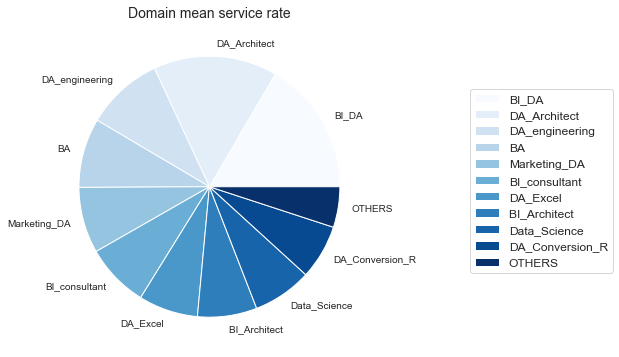

In [18]:

sns.set_style("whitegrid")
df = cohort.groupby('Domain').agg({'Service_price': 'mean'}).sort_values('Service_price', ascending=False)

OTHERS = df.iloc[10:].mean()
df.drop(df.iloc[10:].index.tolist(), inplace=True)
df.loc['OTHERS'] = OTHERS

ax = df.plot.pie(y='Service_price', figsize=(6, 6), colormap='Blues')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.3, 0.8), loc=2, borderaxespad=0., fontsize=12)
plt.ylabel(' ')
plt.title('Domain mean service rate', fontsize=14)
plt.show()

In [111]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

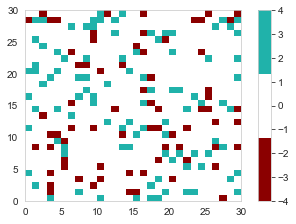

In [112]:
cmap = ListedColormap(["darkred","white", "lightseagreen"])
plot_examples([cmap])